# **Y-Scrambling for Modeling of São Paulo Beer Consumption Dataset**


*Y column is scrambled, shuffled or permutated. In plain English: "change the order of".*


# Read in data

In [ ]:
import pandas as pd

In [ ]:
projects = 'city_temperature.csv'
dataset = pd.read_csv(projects)
dataset

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


# Y-Scrambling

In [ ]:
# Data set
X = dataset.query("City == 'Mexico City'").drop(['AvgTemperature','Region','Country','State','City'], axis=1)
Y = dataset.query("City == 'Mexico City'").iloc[:,-1]
Y

# X.isna().sum() 
# X.dropna(inplace=True)
# Y.dropna(inplace=True)

1212930    57.7
1212931    56.1
1212932    57.6
1212933    57.3
1212934    58.8
           ... 
1222190    63.7
1222191    65.6
1222192    63.6
1222193    62.8
1222194    66.6
Name: AvgTemperature, Length: 9265, dtype: float64

In [ ]:
Y.sample(frac=1, replace=False, random_state=0)
Y

1212930    57.7
1212931    56.1
1212932    57.6
1212933    57.3
1212934    58.8
           ... 
1222190    63.7
1222191    65.6
1222192    63.6
1222193    62.8
1222194    66.6
Name: AvgTemperature, Length: 9265, dtype: float64

# Original vs Y-scrambled model

### Model from original X-Y pairs

In [ ]:
# Model from original X-Y pairs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Luciano code
from sklearn.metrics import accuracy_score

# Data set
# X = dataset.drop(['logS'], axis=1)
# Y = dataset.iloc[:,-1]

# Data split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Y-Shuffling


# Model building
model = LinearRegression()
model.fit(X_train, Y_train)
# Make prediction
Y_train_pred = model.predict(X_train)
# Compute R2 score
r2a = r2_score(Y_train, Y_train_pred)

# Print R2 score
print('R² = %s' % r2a.round(2))

# asd = accuracy_score(Y_train, Y_train_pred)
# print('Accuracy = %s' % ac_score.round(2))




R² = 0.0


Text(0.5, 0, 'Consumption')

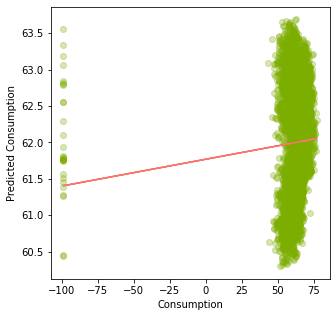

In [ ]:
# Plot of predicted vs actual
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=Y_train, y=Y_train_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_train_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted Consumption')
plt.xlabel('Consumption')


### Build Y-scrambled models

In [ ]:
# Build Y-scrambled models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

r2_train_list = []

# Data set
# X = dataset.drop(['logS'], axis=1)
# Y = dataset.iloc[:,-1]
X = dataset.drop(['data','temp_media','temp_min','consumo'], axis=1)
Y = dataset.iloc[:,6]

# Data split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

for i in range(1000):
  # Y-Shuffling
  Y_train1 = Y_train.sample(frac=1, replace=False, random_state=i)
  # Model building
  model = LinearRegression()
  model.fit(X_train, Y_train1)
  # Make prediction
  Y_train_pred = model.predict(X_train)
  # Compute R2 score
  r2b = r2_score(Y_train1, Y_train_pred)
  r2_train_list.append(r2b)
# Print R2 score
r2_train_list

KeyError: ignored

In [ ]:
# Histogram plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")
plt.figure(figsize = (20, 2)) 

ax = sns.histplot(data=r2_train_list, color="skyblue", kde=True, bins = 7)
plt.axvline(r2a)
ax.set(xlim=(0, 1))